In [ ]:
#data inspection

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# Determine project root (handle running from the notebooks/ folder)
nb_dir = Path.cwd()
project_root = nb_dir if (nb_dir / 'data').exists() else nb_dir.parent
train_df = pd.read_csv(str(project_root / 'data' / 'raw' / 'train' / 'train.csv'))
val_df   = pd.read_csv(str(project_root / 'data' / 'raw' / 'val' / 'val.csv'))

print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)


Train shape: (10015, 15)
Validation shape: (193, 15)


In [7]:
#3. Class Distribution
print("\nTrain diagnosis distribution:")
print(train_df["diagnosis_1"].value_counts())

print("\nValidation diagnosis distribution:")
print(val_df["diagnosis_1"].value_counts())


Train diagnosis distribution:
diagnosis_1
Benign           8061
Malignant        1824
Indeterminate     130
Name: count, dtype: int64

Validation diagnosis distribution:
diagnosis_1
Benign       149
Malignant     44
Name: count, dtype: int64


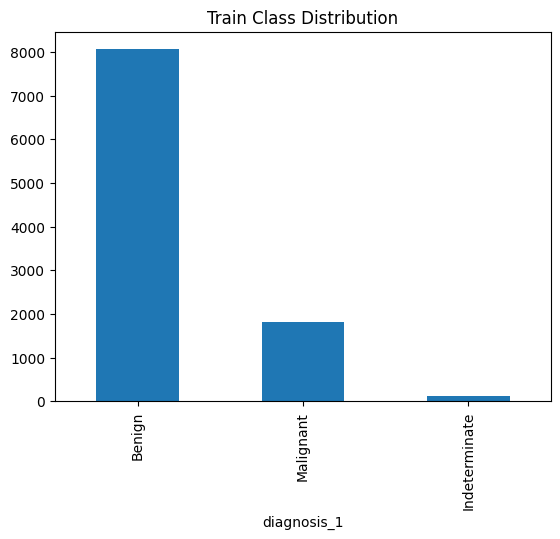

In [8]:
train_df["diagnosis_1"].value_counts().plot(kind="bar", title="Train Class Distribution")
plt.show()


In [9]:
# Check Missing Metadata
print("\nMissing values in training metadata:")
print(train_df.isnull().sum())

print("\nMissing values in validation metadata:")
print(val_df.isnull().sum())


Missing values in training metadata:
isic_id                      0
attribution                  0
copyright_license            0
age_approx                  94
anatom_site_general       1638
anatom_site_special       9551
concomitant_biopsy           0
diagnosis_1                  0
diagnosis_2                  0
diagnosis_3                142
diagnosis_confirm_type       0
image_type                   0
lesion_id                    0
melanocytic                  0
sex                         47
dtype: int64

Missing values in validation metadata:
isic_id                     0
attribution                 0
copyright_license           0
age_approx                  1
anatom_site_general        38
anatom_site_special       185
concomitant_biopsy          0
diagnosis_1                 0
diagnosis_2                 0
diagnosis_3                 3
diagnosis_confirm_type      0
image_type                  0
lesion_id                   0
melanocytic                 0
sex                     

In [16]:
#5. Image–Label Consistency Check

nb_dir = Path.cwd()
project_root = nb_dir if (nb_dir / 'data').exists() else nb_dir.parent
train_img_dir = Path(project_root / 'data' / 'raw' / 'train' / 'images_train')
val_img_dir   = Path(project_root / 'data' / 'raw' / 'val' / 'images_val')

#train_img_dir = Path("project_root/data/raw/train/images_train")
#val_img_dir   = Path("project_root/data/raw/val/images_val")

def check_missing_images(df, img_dir):
    missing = []
    for img_id in df["isic_id"]:
        if not (img_dir / f"{img_id}.jpg").exists():
            missing.append(img_id)
    return missing

train_missing = check_missing_images(train_df, train_img_dir)
val_missing   = check_missing_images(val_df, val_img_dir)

print("Missing train images:", len(train_missing))
print("Missing validation images:", len(val_missing))

Missing train images: 0
Missing validation images: 0


In [17]:
#6. Image Resolution & Aspect Ratio Analysis
def inspect_image_sizes(df, img_dir, sample_size=50):
    sizes = []
    for img_id in df["isic_id"].sample(sample_size):
        img = Image.open(img_dir / f"{img_id}.jpg")
        sizes.append(img.size)
    return sizes

train_sizes = inspect_image_sizes(train_df, train_img_dir)
val_sizes   = inspect_image_sizes(val_df, val_img_dir)

print("Sample train image sizes:", train_sizes[:5])
print("Sample val image sizes:", val_sizes[:5])

Sample train image sizes: [(600, 450), (600, 450), (600, 450), (600, 450), (600, 450)]
Sample val image sizes: [(600, 450), (600, 450), (600, 450), (600, 450), (600, 450)]


#image inspection visualization

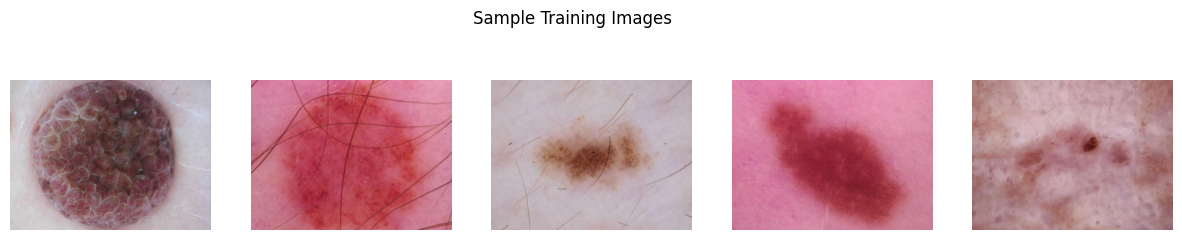

In [18]:
def show_images(df, img_dir, title, n=5):
    plt.figure(figsize=(15,3))
    for i, img_id in enumerate(df["isic_id"].sample(n)):
        img = Image.open(img_dir / f"{img_id}.jpg")
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_images(train_df, train_img_dir, "Sample Training Images")


                  Train  Validation
diagnosis_1                        
Benign         0.804893    0.772021
Indeterminate  0.012981         NaN
Malignant      0.182127    0.227979


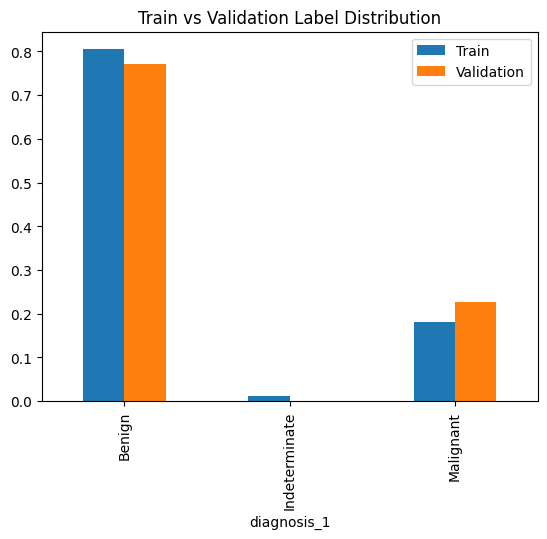

In [24]:
#8. Train vs Validation Distribution Comparison
train_ratio = train_df["diagnosis_1"].value_counts(normalize=True)
val_ratio   = val_df["diagnosis_1"].value_counts(normalize=True)

dist_df = pd.DataFrame({
    "Train": train_ratio,
    "Validation": val_ratio
})

print(dist_df)
dist_df.plot(kind="bar", title="Train vs Validation Label Distribution")
plt.show()


In [25]:
#9. Duplicate & Leakage Check
common_ids = set(train_df["isic_id"]).intersection(set(val_df["isic_id"]))
print("Common images between train & validation:", len(common_ids))

Common images between train & validation: 0


In [26]:
#10. Early Fairness Signals (Metadata Distribution)
for col in ["sex", "age_approx", "anatom_site_general"]:
    if col in train_df.columns:
        print(f"\nDistribution of {col}:")
        print(train_df[col].value_counts().head())


Distribution of sex:
sex
male      5408
female    4560
Name: count, dtype: int64

Distribution of age_approx:
age_approx
45.0    1299
50.0    1189
55.0    1009
40.0     987
60.0     803
Name: count, dtype: int64

Distribution of anatom_site_general:
anatom_site_general
lower extremity    2396
posterior torso    2192
anterior torso     1429
upper extremity    1208
head/neck          1097
Name: count, dtype: int64
